In [1]:
from astropy.io import fits
from astropy.nddata import Cutout2D, block_reduce
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from regions import PolygonSkyRegion

from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
from reproject import reproject_interp

from matplotlib import pyplot as plt
import glob
import numpy as np
import shutil
import time
import os
from tqdm import tqdm

from IPython.display import clear_output

In [3]:
workdir = 'C:/Users/oryan/Documents/ngc5907_study/'

In [4]:
fits_files = glob.glob(f'{workdir}/data/overscan-subbed/*.fits')

In [6]:
with fits.open(fits_files[0]) as f:
    hdr = f[0].header
    data = f[0].data

In [38]:
exp_time = 119.0
files = []
for i in fits_files:
    # with fits.open(i) as f:
    #     hdr = f[0].header
    # test_t = hdr['EXPTIME']
    # if test_t != exp_time:
    #     break
    files.append(i)

In [39]:
hduls = [fits.open(file)[0] for file in files]

In [40]:
wcs_out, shape_out = find_optimal_celestial_wcs(hduls)
array, footprint = reproject_and_coadd(hduls,
                                       wcs_out, shape_out=shape_out,
                                       reproject_function=reproject_interp)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:11:21.062' from MJD-END'. [astropy.wcs.wcs]
  'degree' -> 'deg',
  'degree' -> 'deg'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:14:42.029' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:17:12.019' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:19:40.022' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:22:08.026' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:24:36.029' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:32:51.101' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:38:03.005' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:40:53.990' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:43:44.976' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:46:36.048' from MJD-END'. [astropy.wcs.wcs]
Set DATE-END to '2010-04-12T14:57:16.013' from 

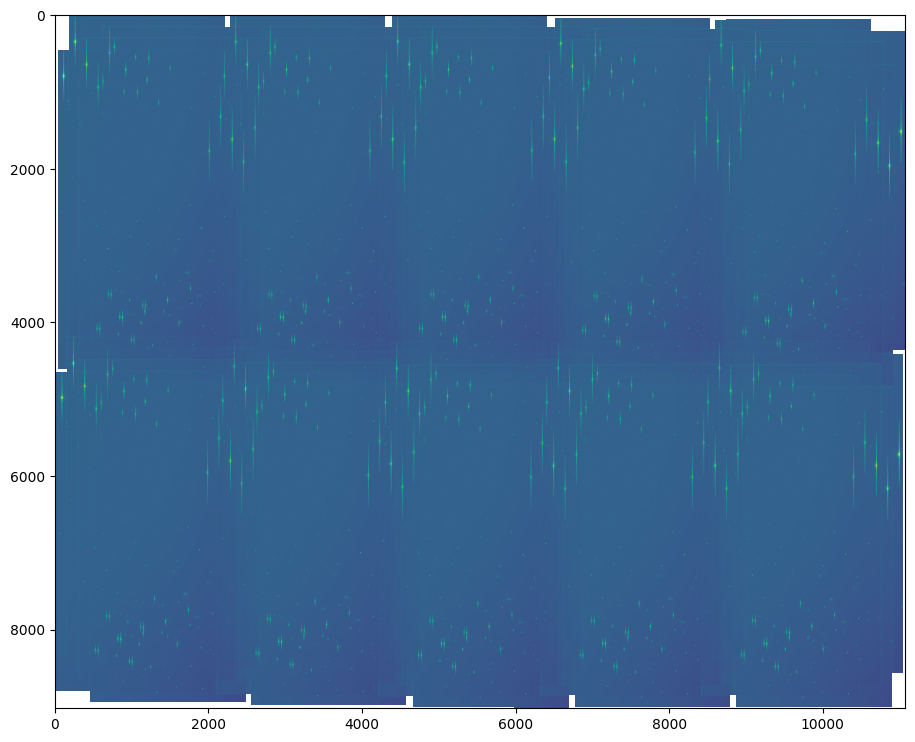

In [37]:
plt.figure(figsize = (18,9))
plt.imshow(np.log10(array))
plt.show()